# Statistics Review: Point Estimation & Confidence Intervals

#### *4 October 2019*
#### *DATA 1010*

In [1]:
using Plots, Distributions

The central problem of statistics is to make inferences about a population or data-generating process based on the information in a finite sample drawn from the population. Last class we talked about kernel density estimation, which directly estimates the distribution. Today we'll talk about estimating values which boil the distribution down to a single number.

---

**Point estimation** is the inference of a single real-valued feature of the distribution of the data-generating process (such as its mean, variance, or median).

## Problem 1 - Mean and Variance of Unknown Distr

Run the code below to define a function called `mysteryRV` which can be called (with no arguments) to sample from an unknown distribution. Also defined is a function `check_mean` which can be called with a single argument to check whether the supplied value is close to the mean of the underlying distribution. Figure out how to ascertain the mean accurately enough to get `check_mean` to respond affirmatively. Repeat with `check_var` (also defined in "mystery-distribution.jl").

In [2]:
include("mystery-distribution.jl")

mysteryRV (generic function with 1 method)

In [3]:
mysteryRV()

2.5743953581696593

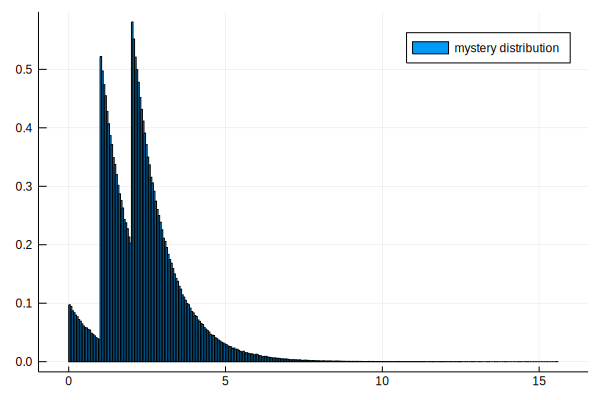

In [4]:
histogram([[mysteryRV() for _ in 1:1_000_000]], label="mystery distribution", normed = true)

In [5]:
# Technique of Monte Carlo
μ = mean(mysteryRV() for _ in 1:1_000_000)

2.3006449802261613

In [6]:
check_mean(2.29)

"correct! The mean is 2.3"

In [7]:
# This is NOT sample variance, sample variance treat each sample with same prob
mean((mysteryRV()-μ)^2 for _ in 1:1_000_000)

1.411012080642238

In [8]:
check_var(1.41)

"correct! The variance is 1.41"

---

A **statistical functional** is any function $T$ from the set of distributions to $[-\infty,\infty]$. An **estimator** $\widehat{\theta}$ is a random variable defined in terms of $n$ i.i.d. random variables, the purpose of which is to approximate some statistical functional of the random variables’ common distribution. 

*Example: Suppose that $T(\nu)$ = the mean of $\nu$, and that $\widehat{\theta} = \frac{(X_1 + \cdots + X_n)}{n}$.*

# Note: statistical functional takes a "distribution" as an input and return a "number" as output

## Problem 2 - Def of Statistical Functional and Estimator

(a) Suppose that $X$  is an integer-valued random variable, and that $T$ is defined to the units digit of $X$. Is $T$ a statistical functional? 

*Solution:*  
(a) No. It's a random variable. Statistical functional takes a distribution as a input and return a number (not a random variable). Thus statistical functional does not involve randomness.  

(b) Suppose that for any probability measure $\nu$ on the plane, $T(\nu)$ is defined to be the expected squared distance between two points drawn independently from $\nu$. Is $T$ a statistical functional? Is $\widehat{\theta}(\mathbf{X}_1, \ldots, \mathbf{X}_n) = |\mathbf{X}_1|$ an estimator of $T$?

![](images/2.PNG)

![](images/2a.PNG)

![](images/2b.PNG)

*Solution:*  
(b) Yes. It is a statistical functional, since its domain is the set of all distributions on some set (namely, the plane), and its codomain is the set of real numbers. Yes, $\widehat{\theta}$ is an estimator by definition (although it's not a good one).

(c) Come up with your own statistical functional (unique enough that it can't be boiled down to a single word). 

![](images/3.PNG)

*Solution*  
(c) Let's define $T(\nu)$ to be the mean of $\nu$ plus 0.7 times the median of $\nu$.

![](images/4.PNG)

---

## Problem 3 - Empirical Measure and Plug-in Estimator

The **empirical measure** associated with a given set of observations is the discrete probability measure which assigns a probability mass of $\frac{1}{n}$ to the location of each of the observations in the sample. 

![](images/5.PNG)

The **plug-in estimator** of a statistical functional $T$ is the random variable $T(\widehat{\nu})$, where $\widehat{\nu}$ is the empirical measure. (instead of plug in true distribution, we plug in the empirical distribution for that statistical functional)

(a) Is the empirical measure random (in other words, if we collected a fresh set of observations, would we get the same measure)? Is the underlying probability measure used to generate the observations random?  

*Solution:*  
(a) Yes. it is random because it depends on the observation drawn (they are drawn independently from the underlying measure). No, the underlying measure is not random.

(b) Why is the empirical measure useless when it comes to estimating the conditional expectation of $Y$ given $X$, assuming that the joint distribution of $X$ and $Y$ is represented by a density function?  

![](images/6.PNG)

# Note: when the vertical line hits not points, the conditional expectation is not defined

*Solution:*  
(b) It's useless because most vertical lines won't hit any of the observations, so we don't get a conditional distribution of $Y$ given $X$ that we can take the mean of.

(c) Is the sample mean a plug-in estimator?

*Solution:*  
(c) Yes, the mean of a discrete uniform distribution is the average of locations of those points.

---

### Bias

Given a distribution $\nu$ and a statistical functional $T$, let $\theta = T(\nu)$. The **bias** of an estimator of $\theta$ is the difference between the estimator’s expected value and $\theta$.

*Example: The expectation of the sample mean $\widehat{\theta} = \frac{(X_1 + \cdots + X_n)}{n}$ is $\frac{\mathbb{E}(X_1 + \cdots + X_n)}{n} = \mathbb{E}[\nu],$ so the bias of the sample mean is zero.*

## Problem 4 - Sample Mean (Unbiased)

Compute the sample mean for five observations from the uniform distribution on $[0,1]$. Repeat a million times and make a histogram of the resulting million sample mean values. Does the sample mean appear to be unbiased?

In [9]:
mean(rand(5))

0.34609343223430794

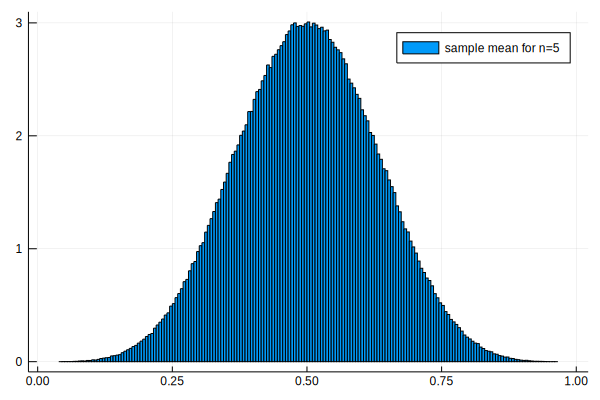

In [12]:
N = 10^6
histogram([mean(rand() for _ in 1:5) for _ in 1:N], label="sample mean for n=5", normed=true)

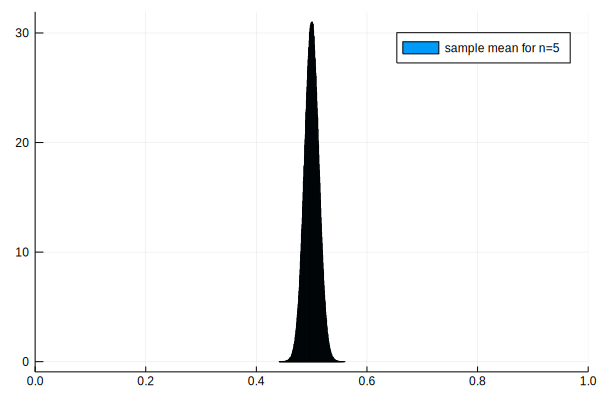

In [18]:
# Ideal situation when 500 observations are taken
histogram([mean(rand() for _ in 1:500) for _ in 1:N], label="sample mean for n=5", normed=true, xlims=(0,1))

So this estimator is unbiased.

## Problem 5 - Sample Maximum (Biased)

Compute the sample maximum (that is, the plug-in estimator for the distribution maximum) for five observations from the uniform distribution on $[0,1]$. Repeat a million times and make a histogram of the resulting million sample maximum values. Does the sample mean appear to be unbiased?

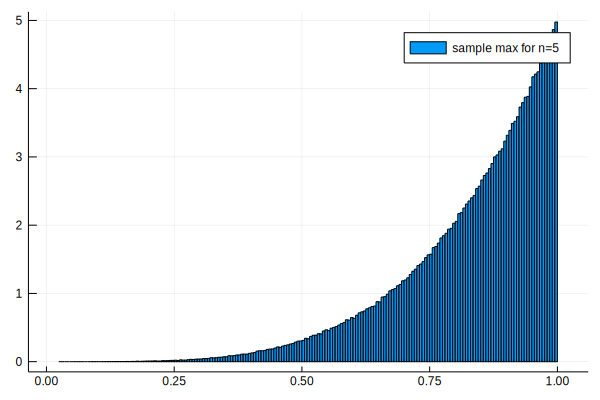

In [14]:
# sample maximum, negative bias
histogram([maximum(rand() for _ in 1:5) for _ in 1:N], label="sample max for n=5", normed=true)

*Solution:*  
The estimator is negatively biased, since the estimator is always strictly less than the actual value of the statistical functional being estimated. (the expected value is less than the true value - 1). In other words, $\hat\theta < T(\nu)$, therefore $E[\hat\theta] < T(\nu)$

---

The **standard error** of an estimator is its standard deviation.  

## Problem 6 - Standard Error of Sample Maximum

Estimate the standard error of the sample maximum estimator (Note that the estimator itself is a random variable) (same as the previous problem: five observations from the uniform distribution on [0,1]). 

In [15]:
# Use Monte Carlo Estimation
sample_maxes = [maximum(rand() for _ in 1:5) for _ in 1:N]
sample_mean = mean(sample_maxes) # around 0.83 = 5/6
# Estimate Variance
mean((x-5/6)^2 for x in sample_maxes)

0.01981717060967453

In [16]:
check_var_sample_max(0.0198)

"correct! The variance is 5/252"

In [17]:
# Get the standard error
sqrt(mean((x-5/6)^2 for x in sample_maxes))

0.1407734726774705

![](images/10.PNG)

---

An estimator is **consistent** if $\widehat{\theta} \to \theta$ in probability as $n\to\infty$, where n is the number of observations. This happens if and only if both the **bias** and the **standard error** go to zero as $n\to\infty$. (Consistency has nothing to do with biased or unbiased.) (Both Sample Mean and Sample Maximum are consistent while sample mean is unbiased and sample max is biased) (The estimator that is NOT consistent is the estimator in problem 2(b))

---
# Confidence Intervals

Estimator usually does not tell us much because we cannot generate the observations again and again in the real world.

## Problem 7

(a) Approximate the mean of the distribution which generated the values stored in the vector `mysample`. 

In [19]:
mysample

10-element Array{Float64,1}:
 -0.3158449050816192
  1.0231649888798504
  1.9117770902002116
  2.504598442341676 
  4.968809090699897 
 -2.4899557184464394
  3.0741347708680196
  5.148240637619786 
  2.101505157727294 
  1.3321877268998883

In [20]:
mean(mysample)

1.9258617281708563

(b) If one were to propose that the mean of the underlying distribution that generated these data is 2, would you find that implausible? How about 6?

*Solution:*  
2 would be a more plausible mean than 6.

---

**Confidence intervals** are estimators with error bars. In other words, rather than returning a single value as our estimator, we return an entire interval together with a confidence level $1-\alpha$. We're saying that the probability that that interval traps the true value of the statistical functional is at least $1-\alpha$.


## Problem 8

The distribution that the entries of `mysample` were drawn from is normal with unknown mean $\mu$ and variance $\sigma^2$. The distribution of the sample mean is therefore also normal. Use this information find a 95% confidence interval for the mean $\mu$.

In [21]:
mysample

10-element Array{Float64,1}:
 -0.3158449050816192
  1.0231649888798504
  1.9117770902002116
  2.504598442341676 
  4.968809090699897 
 -2.4899557184464394
  3.0741347708680196
  5.148240637619786 
  2.101505157727294 
  1.3321877268998883

In [26]:
μ_h, σ_h, n = mean(mysample), std(mysample), length(mysample)

(1.9258617281708563, 2.285698852959919, 10)

![](images/7.PNG)

![](images/8.PNG)

In [27]:
# our confidence interval
(μ_h - 1.96σ_h/√(n), μ_h + 1.96σ_h/√(n))

(0.5091709017356787, 3.342552554606034)

---

## Problem 9 - CI for Sample Mean

Write a function which accepts a vector as an argument, returns a 95\% confidence interval for the mean of the distribution that the observations in the vector were drawn from (using the normal approximation). Run the function `traps_mean` several times to see whether your confidence interval does trap the true mean about 95% of the time.

In [28]:
# pretending the standard deviation of sample mean is the true underlying standard deviation
function confidence_interval_mean(X)
    μ_h, σ_h, n = mean(X), std(X), length(X)
    (μ_h - 1.96σ_h/√(n), μ_h + 1.96σ_h/√(n))
end

confidence_interval_mean (generic function with 1 method)

In [29]:
# Generate some data
# check does this CI trap the mean of the distribution used to generate it
traps_mean(confidence_interval_mean)

X is [3.66, 6.93, 3.58, 2.62, 7.08, 5.94, 4.0, 2.95, 7.51, 2.97, 7.63, 5.18, 8.71, 4.86, 3.44, 4.94, 4.46]
confidence interval is (4.185766888310237, 5.98542957167888)
actual mean of underlying distribution is 5.011069057769642
interval traps 5.011069057769642


true

---

## Problem 10 - CI for Sample Maximum (can't use normal approximation)

Write a function which accepts a vector as an argument, returns a 95\% confidence interval for the maximum of the distribution that the observations in the vector were drawn from (using the assumption that the distribution is uniform on $[0,b]$ for some unknown $b$.). Run the function `traps_max` several times to see whether your confidence interval does trap the true mean about 95% of the time.

![](images/9.PNG)

In [31]:
function confidence_interval_max(X)
    M, n = maximum(X), length(X)
    (M, M/0.05^(1/n))
end

confidence_interval_max (generic function with 1 method)

In [32]:
traps_max(confidence_interval_max)

X is [40.04, 3.61, 19.88, 89.39, 75.41, 8.39, 56.17, 60.71, 40.93, 14.57, 88.14, 72.02, 30.52, 3.04]
confidence interval is (89.38773711217148, 110.71555897881798)
actual max of underlying distribution is 99.42385682329989
interval traps 99.42385682329989


true